<a href="https://colab.research.google.com/github/bunnybunbun37204/ML/blob/main/ML_SKIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = "/content/drive/MyDrive/Datas/train/"
test_data = "/content/drive/MyDrive/Datas/test/"

In [ ]:
def one_hot_reload(img):
  img = str(img)
  label = img.split(".")[0]
  print(label)
  if label == 'face':
    ohl = np.array([1,0])
  elif label == 'penis':
    ohl = np.array([0,1])
  else:
    ohl = None
  return ohl

In [ ]:
def train_data_label():
  train_img = []
  for i in tqdm(os.listdir(train_data)):
    path = os.path.join(train_data,i)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    try:
      img = cv2.resize(img,(128,128))
    except:
      print(Exception)
    else:
      train_img.append([np.array(img),one_hot_reload(i)])
  shuffle(train_img)
  return train_img

In [ ]:
def test_data_label():
  test_img = []
  for i in tqdm(os.listdir(test_data)):
    path = os.path.join(test_data,i)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    try:
      img = cv2.resize(img,(128,128))
    except:
      print(Exception)
    else:
      test_img.append([np.array(img),one_hot_reload(i)])
  return test_img

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [ ]:
training_images = train_data_label()
testing_images = test_data_label()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,128,128,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,128,128,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

  6%|▌         | 1/18 [00:00<00:09,  1.82it/s]

penis


 11%|█         | 2/18 [00:01<00:08,  1.88it/s]

penis


 17%|█▋        | 3/18 [00:01<00:07,  1.91it/s]

penis


 22%|██▏       | 4/18 [00:01<00:06,  2.05it/s]

penis


 28%|██▊       | 5/18 [00:02<00:06,  2.12it/s]

penis


 33%|███▎      | 6/18 [00:02<00:05,  2.09it/s]

penis


 39%|███▉      | 7/18 [00:03<00:05,  2.08it/s]

penis


 44%|████▍     | 8/18 [00:03<00:04,  2.17it/s]

penis


 50%|█████     | 9/18 [00:04<00:04,  2.22it/s]

penis


 56%|█████▌    | 10/18 [00:04<00:03,  2.17it/s]

penis


 61%|██████    | 11/18 [00:05<00:03,  2.12it/s]

face


 67%|██████▋   | 12/18 [00:05<00:03,  1.95it/s]

face


 72%|███████▏  | 13/18 [00:06<00:02,  1.84it/s]

face


 78%|███████▊  | 14/18 [00:07<00:02,  1.77it/s]

face


 83%|████████▎ | 15/18 [00:07<00:01,  1.85it/s]

face


 89%|████████▉ | 16/18 [00:07<00:01,  1.92it/s]

face


 94%|█████████▍| 17/18 [00:08<00:00,  1.92it/s]

face


  0%|          | 0/11 [00:00<?, ?it/s]

face


  9%|▉         | 1/11 [00:00<00:04,  2.08it/s]

penis


 18%|█▊        | 2/11 [00:00<00:04,  2.08it/s]

penis


 27%|██▋       | 3/11 [00:01<00:03,  2.17it/s]

penis


 36%|███▋      | 4/11 [00:01<00:03,  2.22it/s]

penis


 45%|████▌     | 5/11 [00:02<00:02,  2.13it/s]

face


 55%|█████▍    | 6/11 [00:02<00:02,  2.10it/s]

face


 64%|██████▎   | 7/11 [00:03<00:01,  2.10it/s]

face


 73%|███████▎  | 8/11 [00:03<00:01,  2.10it/s]

face


 82%|████████▏ | 9/11 [00:04<00:00,  2.22it/s]

penis


100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

penis
penis


In [ ]:
len(tr_img_data[0][0])

128

In [ ]:
tr_lbl_data

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=[128,128,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=5,padding="same"))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=5,padding="same"))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=5,padding="same"))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(3,activation="softmax"))

optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
1/1 [==============================] - 1s 794ms/step - loss: 9.3628 - accuracy: 0.5556
Epoch 2/50
1/1 [==============================] - 0s 277ms/step - loss: 5.5526 - accuracy: 0.4444
Epoch 3/50
1/1 [==============================] - 0s 264ms/step - loss: 9.5040 - accuracy: 0.4444
Epoch 4/50
1/1 [==============================] - 0s 256ms/step - loss: 4.0793 - accuracy: 0.7222
Epoch 5/50
1/1 [==============================] - 0s 262ms/step - loss: 1.9727 - accuracy: 0.6111
Epoch 6/50
1/1 [==============================] - 0s 281ms/step - loss: 1.6309 - accuracy: 0.7778
Epoch 7/50
1/1 [==============================] - 0s 262ms/step - loss: 0.3935 - accuracy: 0.8333
Epoch 8/50
1/1 [==============================] - 0s 260ms/step - loss: 1.7941 - accuracy: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 261ms/step - loss: 1.7607 - accuracy: 0.7778
Epoch 10/50
1/1 [==============================] - 0s 284ms/step - loss: 2.2835 - accuracy: 0.7222
Epoch 11/50
1/1 [==

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[5.229171e-08 1.000000e+00]]
[[4.553297e-12 1.000000e+00]]
[[2.1142685e-11 1.0000000e+00]]
[[9.9999869e-01 1.3174086e-06]]
[[9.999912e-01 8.765049e-06]]
[[9.9999726e-01 2.7623842e-06]]
[[9.9996901e-01 3.0982967e-05]]
[[7.9598325e-18 1.0000000e+00]]
[[1.8036768e-10 1.0000000e+00]]
[[9.994549e-01 5.450823e-04]]


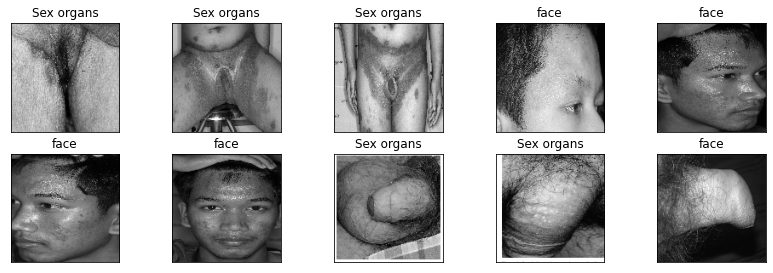

In [ ]:
fig = plt.figure(figsize=(14,14))
for cnt,data in enumerate(testing_images[1:12]):
  y = fig.add_subplot(6,5,cnt+1)
  img = data[0]
  data = img.reshape(1,128,128,1)
  model_out = model.predict([data])
  print(model_out)
  if np.argmax(model_out) == 0:
    str_label = "face"
  else:
    str_label = "Sex organs"
  y.imshow(img,cmap="gray")
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Datasets/"
training_datagen = ImageDataGenerator(
      rescale = 1./255)

VALIDATION_DIR = "/content/drive/MyDrive/Datatest/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 25 images belonging to 3 classes.
Found 13 images belonging to 3 classes.
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 17, 17, 128)       0         
_______________________________________

0.0


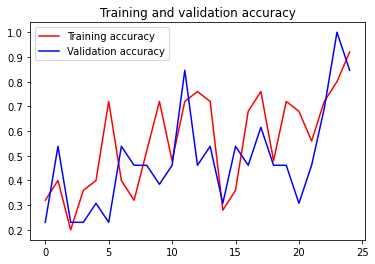

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
MAE = mean_absolute_error(acc, val_acc)
print(MAE)
R2 = r2_score(acc,val_acc)
print(R2)

0.155446155667305
-0.005265255008728653


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving DSC_1063.JPG to DSC_1063.JPG
DSC_1063.JPG
[[0. 0. 1.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving DSC_1045.JPG to DSC_1045.JPG
DSC_1045.JPG
[[0. 1. 0.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving DSC_1037.JPG to DSC_1037 (1).JPG
DSC_1037.JPG
[[1. 0. 0.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving download.jfif to download.jfif
download.jfif
[[0. 1. 0.]]


In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/content/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/unnamed.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.00000012 0.9999999  0.        ]]
